<h1 align="center"> SMS Spam Classifier</h1>

# About Dataset
### Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [1]:
import pandas as pd 
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import string

In [2]:
# load dataset      
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/code?select=spam.csv

df = pd.read_csv('spam.csv', encoding =  'ISO-8859-1')  
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(10)

,v1,v2
5111,ham,I've reached sch already...
2560,ham,Are you still getting the goods.
2812,ham,Enjoy the showers of possessiveness poured on ...
1351,ham,Yo theres no class tmrw right?
4601,ham,\Hey j! r u feeling any better
806,ham,"sure, but make sure he knows we ain't smokin yet"
2210,ham,Just wanted to say holy shit you guys weren't ...
1058,ham,Tell me they're female :V how're you throwing ...
4531,ham,Ok both our days. So what are you making for d...
4736,ham,Nt only for driving even for many reasons she ...


In [7]:
#rename Columns Name
df.rename(columns={'v1' :'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
1448,spam,As a registered optin subscriber ur draw 4 å£1...
291,ham,Haf u found him? I feel so stupid da v cam was...
3710,ham,"Sorry pa, i dont knw who ru pa?"
4499,ham,Nvm take ur time.
4352,ham,Fun fact: although you would think armand woul...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target']= encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

as we can see there is no missing values

In [12]:
#check for duplicates values

df.duplicated().sum()

403

In [13]:
# remove Duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

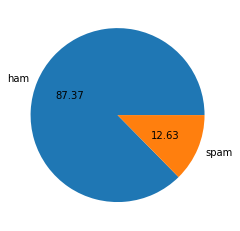

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [18]:
# Data is imbalence

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kolis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_charecters'] =df['text'].apply(len)
df.head(5)

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
df['num_words']  = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_charecters','num_sentences','num_words']].describe()

,num_charecters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,18.453279
std,58.236293,1.362406,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [25]:
#ham
df[df['target'] ==0][['num_charecters','num_sentences','num_words']].describe()

,num_charecters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [26]:
#spam
df[df['target'] ==0][['num_charecters','num_sentences','num_words']].describe()

,num_charecters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [27]:
import seaborn as sns

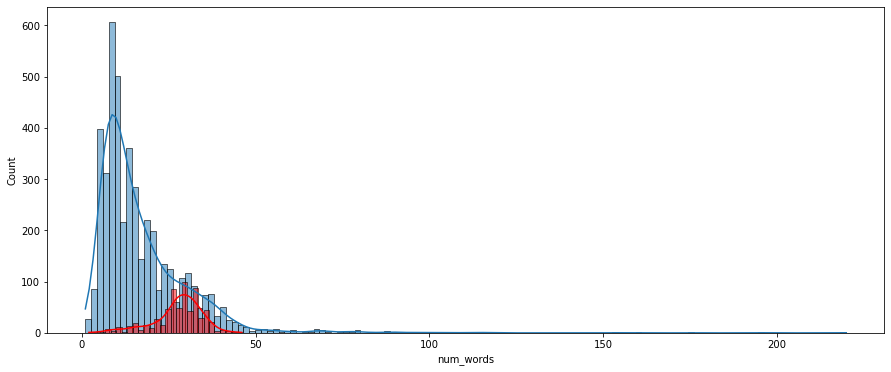

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['target']==0]['num_words'], kde=True)
sns.histplot(df[df['target']==1]['num_words'], color='red',kde=True)
plt.show()

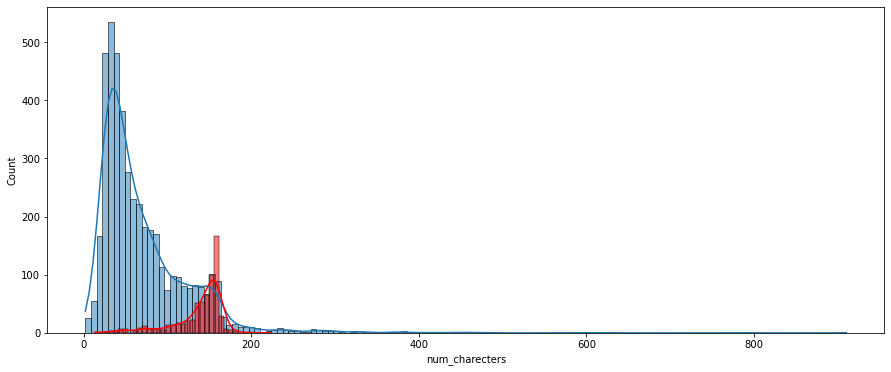

In [29]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['target']==0]['num_charecters'], kde=True)
sns.histplot(df[df['target']==1]['num_charecters'], color='red',kde=True)
plt.show()

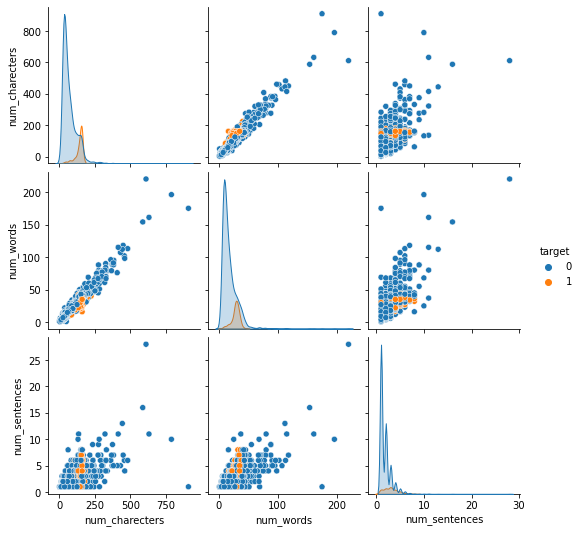

In [30]:
sns.pairplot(df, hue= 'target')
plt.show()

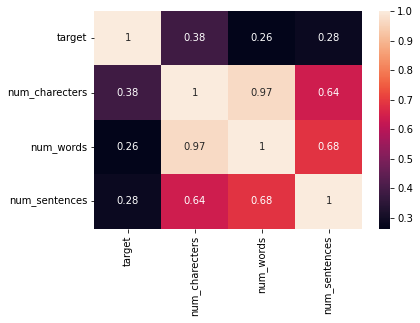

In [31]:
sns.heatmap(df.corr(), annot= True)
plt.show()

# Data Preprocesing
* Lower Case
* Tokenization
* Removing Special Character
* Removing Stop Words and Punctuation
* Steamming

In [32]:
ps = PorterStemmer()

def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
transformed_text('I sent you  &lt;#&gt;  bucks')

'sent lt gt buck'

In [34]:
df['text'][200]

'I sent you  &lt;#&gt;  bucks'

In [35]:
df['transformed_text'] = df['text'].apply(transformed_text)

In [36]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color= 'white')

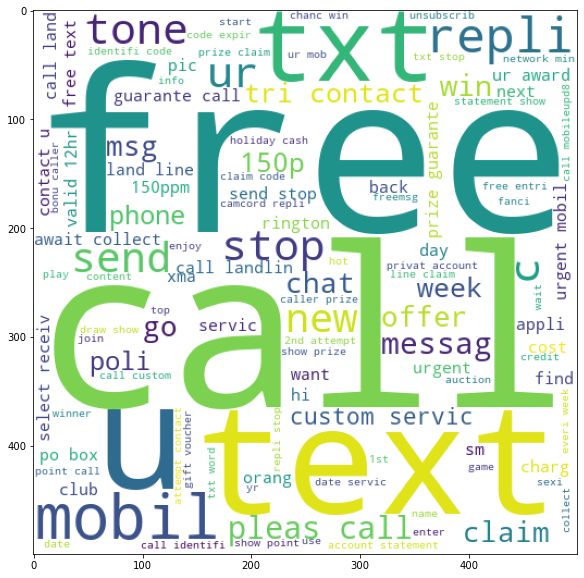

In [38]:
plt.figure(figsize=(16,10))
wc = WordCloud(width=500, height=500, min_font_size=10, background_color= 'white')
text = df[df['target']==1]['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(text)
plt.imshow(spam_wc)
plt.show()

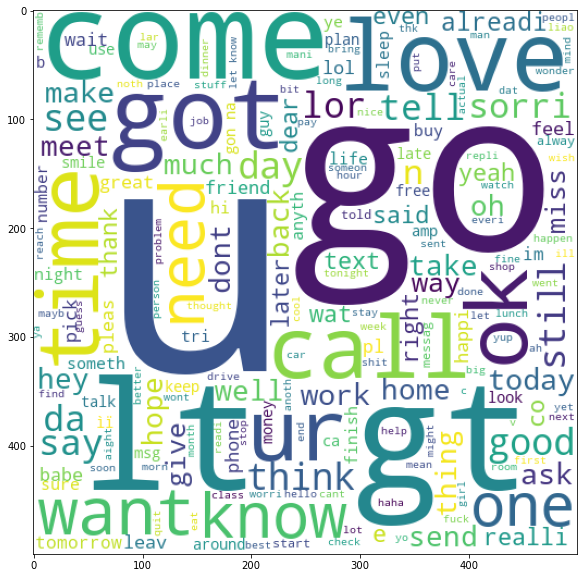

In [39]:
plt.figure(figsize=(16,10))
wc = WordCloud(width=500, height=500, min_font_size=10, background_color= 'white')
text = df[df['target']==0]['transformed_text'].str.cat(sep=" ")
ham_wc = wc.generate(text)
plt.imshow(ham_wc)
plt.show()

In [40]:
spam_corpos = []
top = df[df['target'] ==1]['transformed_text'].tolist()
for msg in top:
    for word in msg.split():
        spam_corpos.append(word)
    

In [41]:
len(spam_corpos)

9939

C:\Users\kolis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


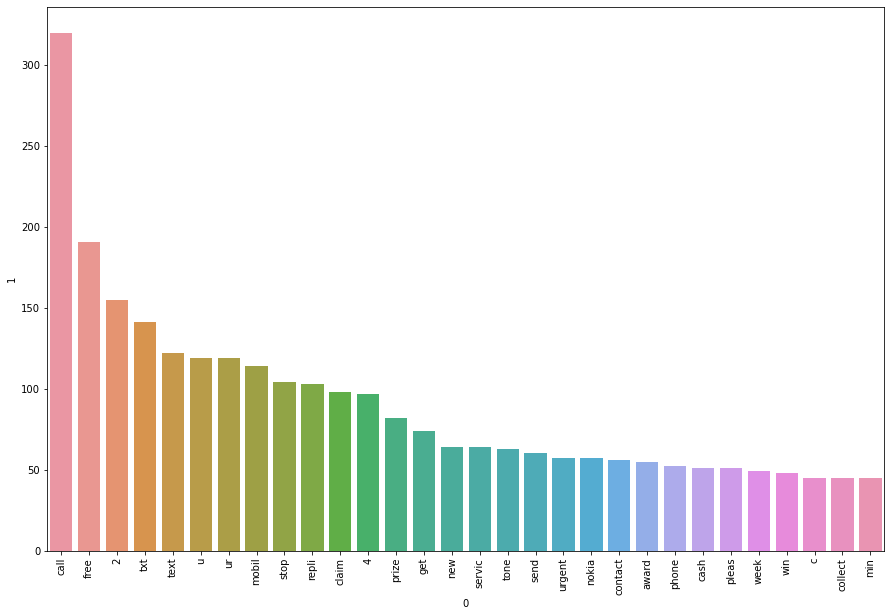

In [42]:
from collections import Counter
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(spam_corpos).most_common(30))[0],
            pd.DataFrame(Counter(spam_corpos).most_common(30))[1])

plt.xticks(rotation = 90)
plt.show()

In [43]:
ham_corpos = []
top = df[df['target'] ==0]['transformed_text'].tolist()
for msg in top:
    for word in msg.split():
        ham_corpos.append(word)

In [44]:
len(ham_corpos)

35394

C:\Users\kolis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


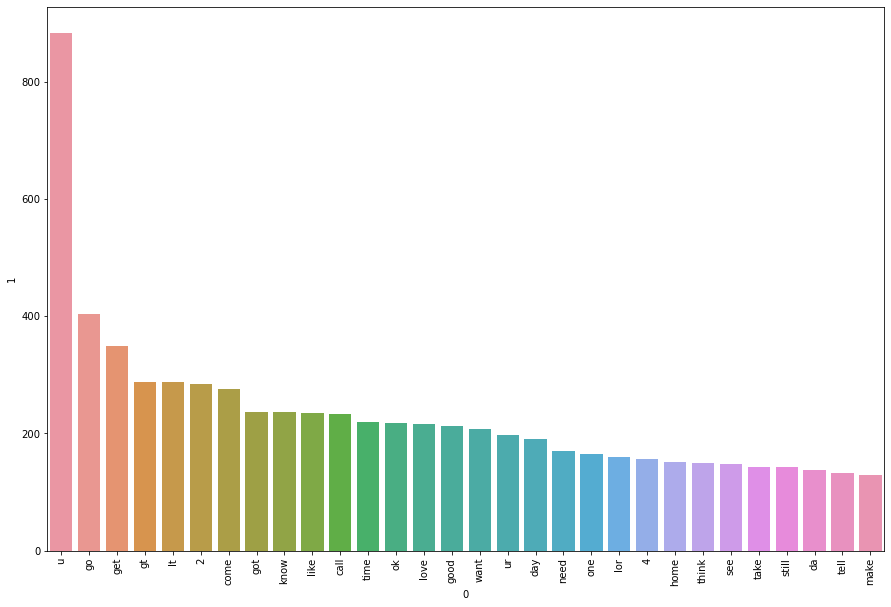

In [45]:
from collections import Counter
plt.figure(figsize=(15,10))
sns.barplot(pd.DataFrame(Counter(ham_corpos).most_common(30))[0],
            pd.DataFrame(Counter(ham_corpos).most_common(30))[1])

plt.xticks(rotation = 90)
plt.show()

# Model Building

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [83]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [84]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [85]:
y = df['target'].values

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y, test_size=0.2,
                                                   random_state=2)

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [88]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [89]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [56]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

C:\Users\kolis\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
kn = KNeighborsClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression(penalty='l1',solver='liblinear')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [59]:
# Voting Classifire
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [60]:
voting = VotingClassifier(estimators=[('svc', svc),
                                      ('nb',mnb),
                                      ('et',etc)],
                          voting='soft')


In [61]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [62]:
y_pred = voting.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [63]:
clfs = {'SVC' : svc,
       "KN" : kn,
       "NB" :mnb,
       "DT" : dtc,
       "LR": lrc,
       "RF": rfc,
       "AdaBoost":abc,
       "BgC": bc,
       "ETC":etc,
       "GBT": gbdt,
       "xgb":xgb}
    

In [64]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precission = precision_score(y_test, y_pred)
    return accuracy, precission

In [65]:
train_classifier(svc, x_train, y_train,x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [66]:
accuracy =[]
precision = []
for name, clf in clfs.items():
    curent_accuracy, current_precision = train_classifier(clf,
                                                           x_train,y_train,x_test,y_test)
    
    print("For", name)
    print('Accuracy -', curent_accuracy)
    print('Precision -', current_precision)
    
    accuracy.append(curent_accuracy)
    precision.append(current_precision)
    

For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9303675048355899
Precision - 0.8173076923076923
For LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
For RF
Accuracy - 0.9748549323017408
Precision - 0.9827586206896551
For AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
For BgC
Accuracy - 0.9574468085106383
Precision - 0.8671875
For ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For GBT
Accuracy - 0.9477756286266924
Precision - 0.92


C:\Users\kolis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:29:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For xgb
Accuracy - 0.971953578336557
Precision - 0.943089430894309


In [67]:
performance_df = pd.DataFrame({'Algoritham':clfs.keys(),
                               'Accuracy':accuracy,
                               'Precision': precision}).sort_values('Precision',
                                                                    ascending=False)

performance_df

,Algoritham,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [68]:
performance_df = pd.melt(performance_df, id_vars='Algoritham')
performance_df

,Algoritham,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


<Figure size 1080x1152 with 0 Axes>

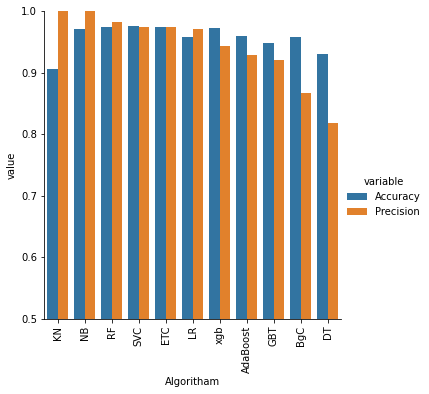

In [69]:
plt.figure(figsize=(15,16))
sns.catplot(x='Algoritham', y='value',
           hue= 'variable', data=performance_df, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
#Model improve
# 1change the max_feature parameter of  IfIdf

In [71]:
temp_df = pd.DataFrame({'Algoritham':clfs.keys(),
                        'Accuracy_max_ft_3000':accuracy,
                        'Precision_max_ft_3000':precision}).sort_values('Precision_max_ft_3000',
                                                                               ascending=False)


In [72]:
temp_df = pd.DataFrame({'Algoritham':clfs.keys(),
                        'Accuracy':accuracy,
                        'Precision':precision}).sort_values('Precision',
                                                            ascending=False)


In [73]:
new_df = performance_df.merge(temp_df,on='Algoritham')

In [74]:
new_df_scaled = new_df.merge(temp_df,on='Algoritham')

In [75]:
temp_df = pd.DataFrame({'Algoritham':clfs.keys(),
                        'Accuracy_num_chars':accuracy,
                        'Precision_num_chars':precision}).sort_values('Precision_num_chars',
                                                                      ascending=False)


In [76]:
new_df_scaled.merge(temp_df,on='Algoritham')

,Algoritham,variable,value,Accuracy_x,Precision_x,Accuracy_y,Precision_y,Accuracy_num_chars,Precision_num_chars
0,KN,Accuracy,0.905222,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,KN,Precision,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,Accuracy,0.970986,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,NB,Precision,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
4,RF,Accuracy,0.974855,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
5,RF,Precision,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
6,SVC,Accuracy,0.975822,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
7,SVC,Precision,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
8,ETC,Accuracy,0.974855,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,ETC,Precision,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576


In [77]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [78]:
from sklearn.ensemble import StackingClassifier

In [79]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [80]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [90]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))